# Regression: New York City Taxi Trip Duration

For the following tasks, you will work with the dataset from the [Playground Prediction Competition: New York City Taxi Trip Duration](https://www.kaggle.com/competitions/nyc-taxi-trip-duration/code?competitionId=6960&sortBy=voteCount).

Based on individual trip attributes, the duration of the trip should be predicted.

**Data fields**

* `id` - a unique identifier for each trip
* `vendor_id` - a code indicating the provider associated with the trip record
* `pickup_datetime` - date and time when the meter was engaged
* `dropoff_datetime` - date and time when the meter was disengaged
* `passenger_count` - the number of passengers in the vehicle (driver entered value)
* `pickup_longitude` - the longitude where the meter was engaged
* `pickup_latitude` - the latitude where the meter was engaged
* `dropoff_longitude` - the longitude where the meter was disengaged
* `dropoff_latitude` - the latitude where the meter was disengaged
* `store_and_fwd_flag` - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* `trip_duration` - duration of the trip in seconds (**target variable**)

**Import libraries**

*   [Pandas](https://pandas.pydata.org/docs/getting_started/index.html#intro-to-pandas) provides data structures to work with relational (tabular) data.
*   [NumPy](https://numpy.org/) provides numerical computing tools (mathematical functions, linear algebra routines, etc.)
*   [Matplotlib](https://matplotlib.org/) allows to create visualizations.
*   [Seaborn](https://seaborn.pydata.org/) is based on Matplotlib. It provides a high-level interface for drawing graphics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# some settings for graphics
sns.set_style("dark")
sns.set(rc={'figure.figsize':(12,4)})

# use this value where it is possible to indicate the random state
RANDOM_STATE = 42

## Task 1. Import data

* Read data into a pd.DataFrame object
* Display table dimensions and a few rows
* Display descriptive statistics
* Check if there are any columns containing unique values for each row. If so, drop them.
* `dropoff_datetime` variable is added only to train data and thus cannot be used by the predictive model. Drop this feature.
* `pickup_datetime` contains date and time when the meter was engaged. Check the type of this feature and change it to `datetime` if it is another type.
* Split data into `train` and `test`: 30% of data for test.


In [6]:
import os

path = '../dataset/New_York_City_Taxi_Trip_Duration.csv'
data = pd.read_csv(path)
os.remove(path)

In [7]:
# display table dimensions
data.shape

(1458644, 11)

In [8]:
# display 10 random rows
data.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
376510,id0950438,2,2016-06-07 23:50:20,2016-06-08 00:34:40,1,-73.997124,40.684502,-73.970619,40.788490,N,2660
1291780,id0088950,2,2016-03-26 18:15:36,2016-03-27 18:09:31,1,-73.988777,40.757744,-73.991913,40.749458,N,86035
914789,id2591269,1,2016-02-23 09:06:38,2016-02-23 09:16:21,1,-73.983887,40.762341,-73.995338,40.764885,N,583
108866,id0378448,2,2016-02-15 15:20:16,2016-02-15 16:13:28,1,-73.977570,40.749722,-73.787079,40.644642,N,3192
770081,id3706478,1,2016-06-12 18:25:06,2016-06-12 18:32:44,1,-73.969765,40.764519,-73.976151,40.776417,N,458
15171,id3622047,1,2016-02-25 14:42:05,2016-02-25 14:57:12,1,-73.994072,40.726795,-74.006500,40.744511,N,907
576595,id1214685,1,2016-01-08 09:23:18,2016-01-08 09:48:06,1,-73.991180,40.748367,-73.865776,40.771038,N,1488
1220150,id3844566,2,2016-01-16 08:11:14,2016-01-16 08:22:13,1,-73.979233,40.746410,-74.000763,40.757671,N,659
943218,id3932528,1,2016-06-10 01:45:58,2016-06-10 01:49:06,1,-73.949638,40.716579,-73.945999,40.724068,N,188
1159851,id3165684,2,2016-04-13 08:54:40,2016-04-13 09:04:05,2,-73.981483,40.768730,-73.966904,40.766762,N,565


In [9]:
# display descriptive statistics
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [10]:
data.describe(include='object')

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
count,1458644,1458644,1458644,1458644
unique,1458644,1380222,1380377,2
top,id1209952,2016-02-09 21:03:38,2016-05-16 19:40:28,N
freq,1,5,5,1450599


In [11]:
# check if there are any columns containing unique values for each row. If so, drop them.
data = data.drop(columns=['id'])

In [12]:
# dropoff_datetime variable is added only to train data and thus cannot be used by the predictive model. Drop this feature.
data = data.drop(columns=['dropoff_datetime'])

In [13]:
# pickup_datetime contains date and time when the meter was engaged. Check the type of this feature and change it to datetime if it is another type.
data['pickup_datetime'].dtype

dtype('O')

In [14]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['pickup_datetime'].head()

0   2016-03-14 17:24:55
1   2016-06-12 00:43:35
2   2016-01-19 11:35:24
3   2016-04-06 19:32:31
4   2016-03-26 13:30:55
Name: pickup_datetime, dtype: datetime64[ns]

In [15]:
# split data into train and test: 30% of data for test.
from sklearn.model_selection import train_test_split

X = data.drop(columns=['trip_duration'])
y = data['trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

## Task 2. Target variable

The target variable is `trip_duration`. Its values should be predicted by a ML model.

### 2.1. Distribution

Check the distribution of the target variable values.

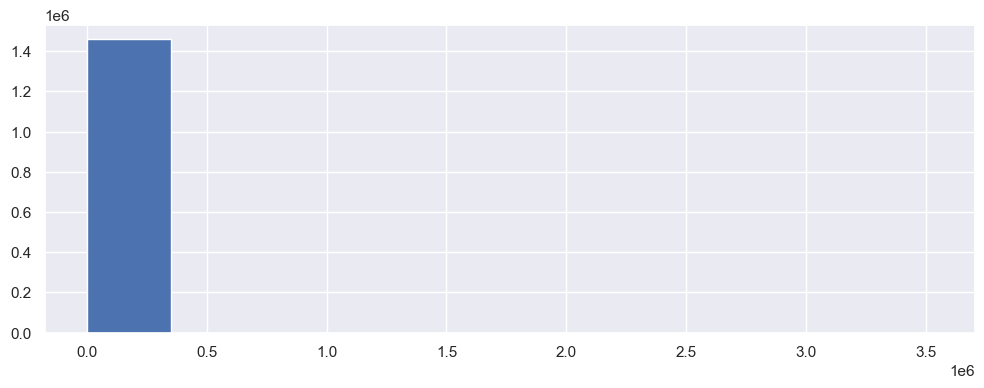

In [16]:
data.trip_duration.hist();

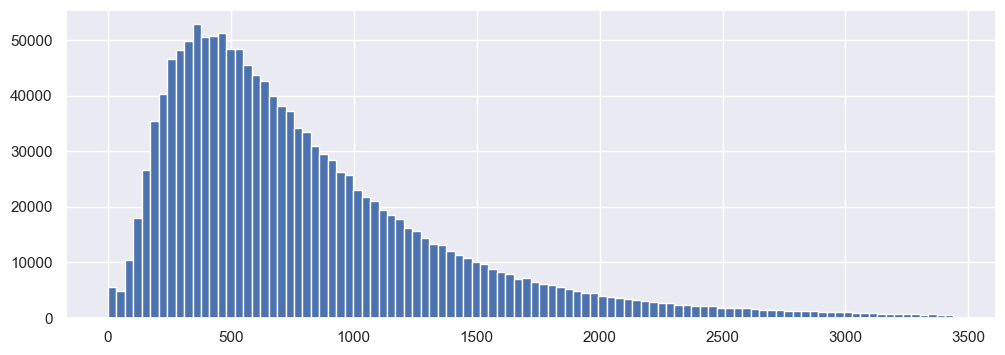

In [17]:
data.trip_duration[data.trip_duration < data.trip_duration.quantile(0.99)].hist(bins=100);

Add your interpretation of the results:

<font color='yellowgreen'>your text here</font>

### 2.2. Evaluation metric

The evaluation metric for this competition is Root Mean Squared Logarithmic Error:

$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Question**: How do you think, why it is RMSLE and not RMSE ([reading](https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a))?

<font color='yellowgreen'>your text here</font>

### 2.3. Target transformation

The logarithm of the target variable has some useful properties. To see this, transform it using `np.log1p` function and display the histogram of this transformed target.

In [18]:
def transform_target(y):
  return np.log1p(y).rename('log_'+y.name)

y = transform_target(y)
y_train = transform_target(y_train)
y_test = transform_target(y_test)

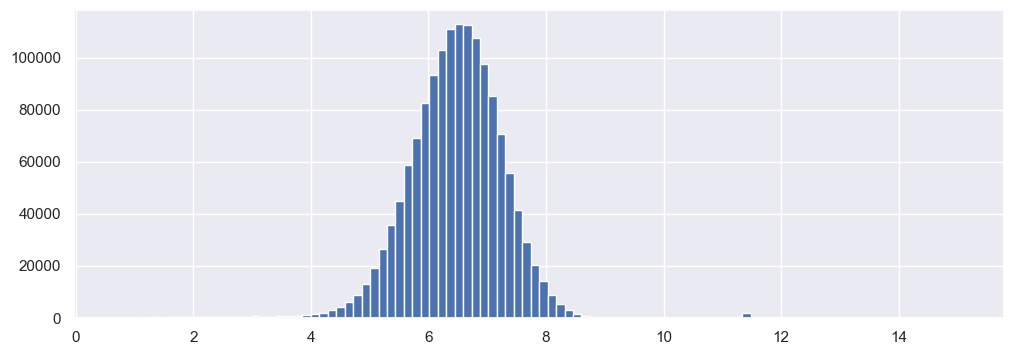

In [19]:
y.hist(bins=100);

## Task 3. Baseline

To have some starting point, calculate the value of the RMSLE metric for the best constant prediction. What value could be considered as the best constant prediction?

In [20]:
from sklearn.metrics import mean_squared_error

y_baseline = y_train.mean()
print(f'Baseline prediction: {y_baseline:.2f} (transformed)')
# np.expm1 is the inverse of log1p
print(f'Baseline prediction: {np.expm1(y_baseline):.0f} (seconds)')

print(f'RMSLE on train data: {mean_squared_error([y_baseline]*len(y_train), y_train, squared=False):.3f}')
print(f'RMSLE on train data: {mean_squared_error([y_baseline]*len(y_test), y_test, squared=False):.3f}')

Baseline prediction: 6.47 (transformed)
Baseline prediction: 643 (seconds)
RMSLE on train data: 0.796
RMSLE on train data: 0.795


c:\Users\Salioudian\IdeaProjects\projet_mlops\taxi_trips\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Salioudian\IdeaProjects\projet_mlops\taxi_trips\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# data['trip_duration'].mean()

## Task 4. `pickup_datetime`

### 4.1. Number of trips ~ date

How many trips are there every day? Display the relationship between the number of trips and the date (you can use `sns.countplot` function).

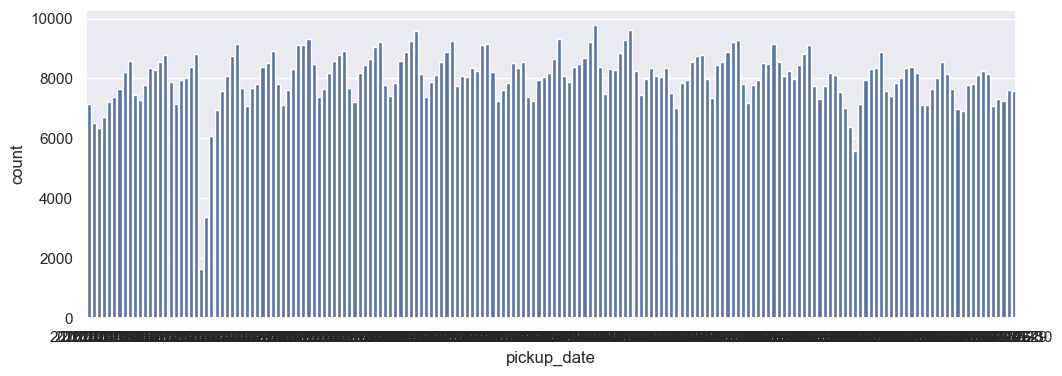

In [21]:
X['pickup_date'] = X['pickup_datetime'].dt.date
dates = X['pickup_date'].sort_values()
g = sns.countplot(x=dates)

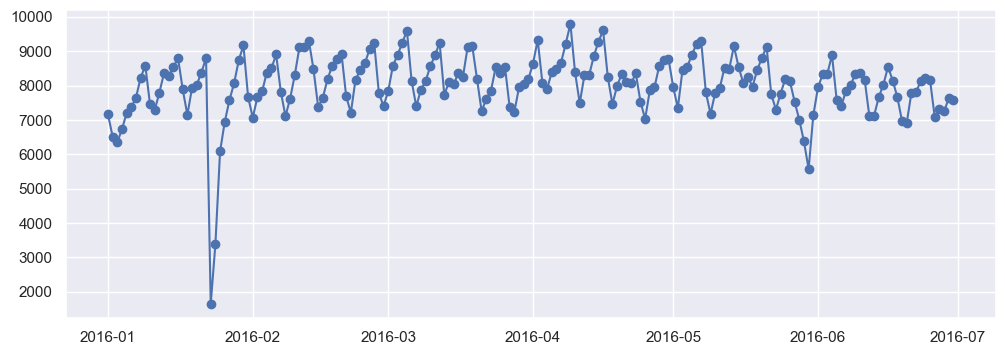

In [22]:
plt.plot(X['pickup_date'].groupby(X['pickup_date']).count(), 'o-');

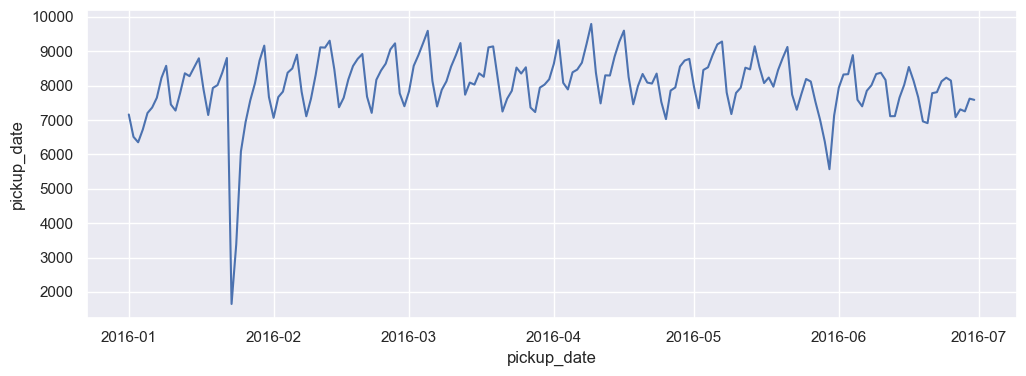

In [24]:
sns.lineplot(X['pickup_date'].groupby(X['pickup_date']).count());

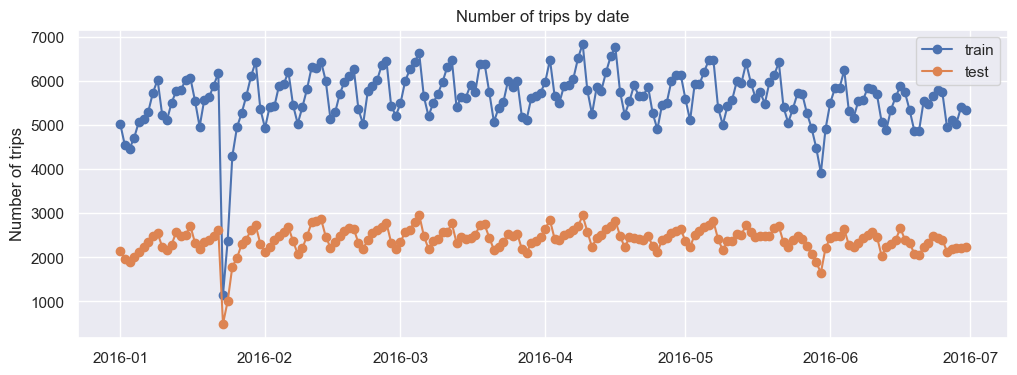

In [25]:
plt.plot(X_train['pickup_datetime'].groupby(X_train['pickup_datetime'].dt.date).count(), 'o-', label='train')
plt.plot(X_test['pickup_datetime'].groupby(X_test['pickup_datetime'].dt.date).count(), 'o-', label='test')
plt.title('Number of trips by date')
plt.legend(loc=0)
plt.ylabel('Number of trips')
plt.show()

**Question**: You might have noticed 2 periods with too few trips compared to the usual number of trips. Check the corresponding dates and see if there were any specific events in New York on those dates that might explain these low values.

In [26]:
df_abnormal_dates = X.groupby('pickup_date').size()
# abnormal_dates = df_abnormal_dates[df_abnormal_dates < df_abnormal_dates.quantile(0.02)]
abnormal_dates = df_abnormal_dates[df_abnormal_dates < 6300]
abnormal_dates

pickup_date
2016-01-23    1648
2016-01-24    3383
2016-01-25    6084
2016-05-30    5570
dtype: int64

### 4.2. Number of trips ~ day of the week, hour of the day

Display two additional graphs: number of trips per weekday and number of journeys per hour of the day.

Display the number of trips per hour of the day and weekday (you can use the `sns.relplot` function).

For weekdays, display the names and not the numbers.

In [27]:
dict_weekday = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

weekday = X['pickup_datetime'].dt.weekday.map(dict_weekday).rename('weekday')
hourofday = X['pickup_datetime'].dt.hour.rename('hour')

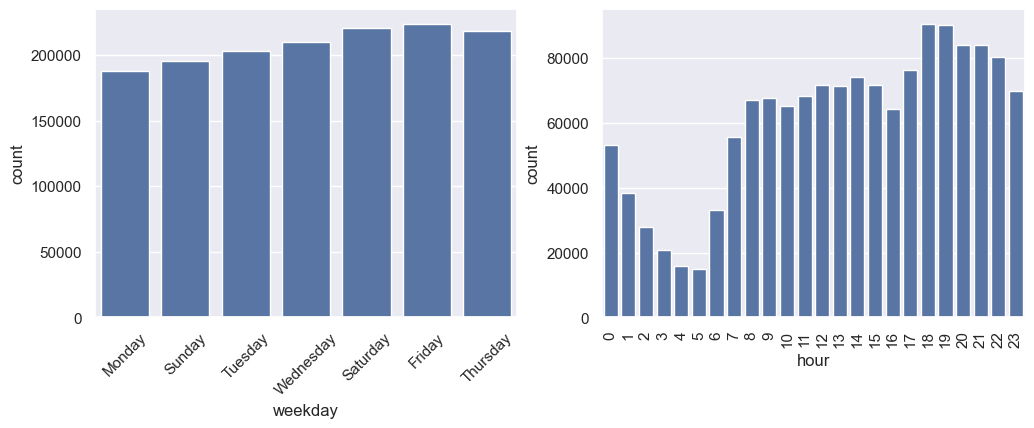

In [28]:
fig, ax = plt.subplots(1,2)
sns.countplot(x=weekday, ax=ax[0])
ax[0].set(xlabel='weekday')
sns.countplot(x=hourofday, ax=ax[1])
ax[1].set(xlabel='hour')
ax[0].tick_params('x', labelrotation=45)
ax[1].tick_params('x', labelrotation=90)
plt.show()

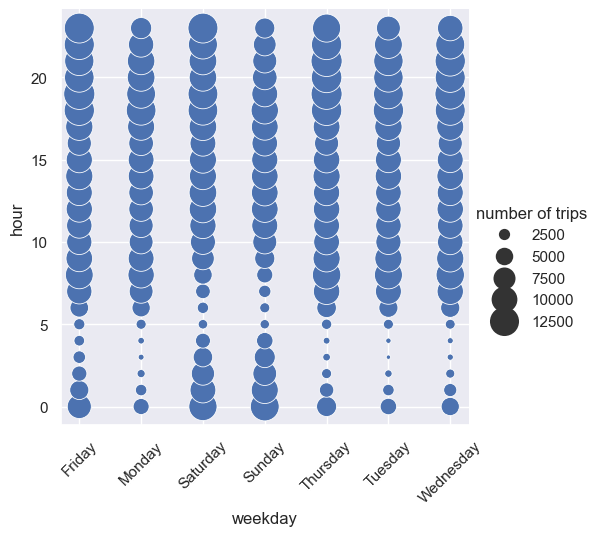

In [29]:
data_plot = X.groupby([weekday, hourofday]).size().rename('number of trips').reset_index()
sns.relplot(data=data_plot, x='weekday', y='hour', size='number of trips', sizes=(10,500))
plt.xticks(rotation=45)
plt.show()

### 4.3. Number of trips ~ hour of the day for different months

Display on a single graph the dependency of the number of trips and the hour of the day for different months (one curve per month). The curves corresponding to different months should be displayed in different colours.

Also display a graph showing the dependency of the number of trips on the hour of the day for different days of the week (one curve per day of the week).

In [30]:
month = X.pickup_datetime.dt.month.rename('month')

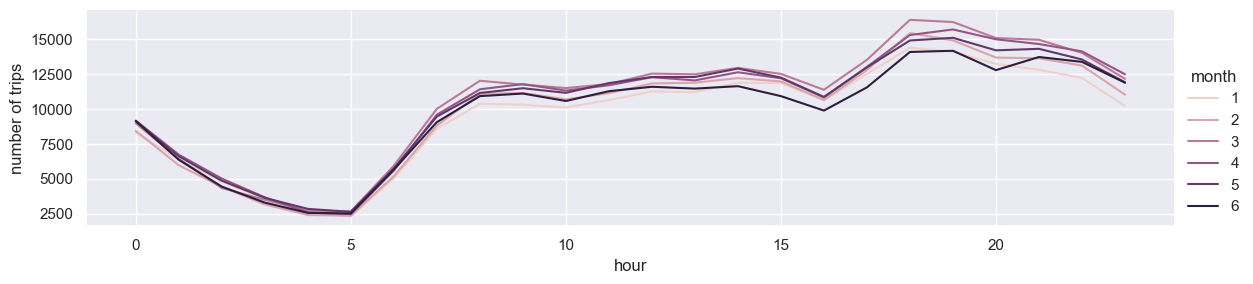

In [31]:
data_plot = X.groupby([month, hourofday]).size().rename('number of trips').reset_index()
sns.relplot(data=data_plot, x='hour', y='number of trips', hue='month', kind='line', height=3, aspect=4)
plt.show()

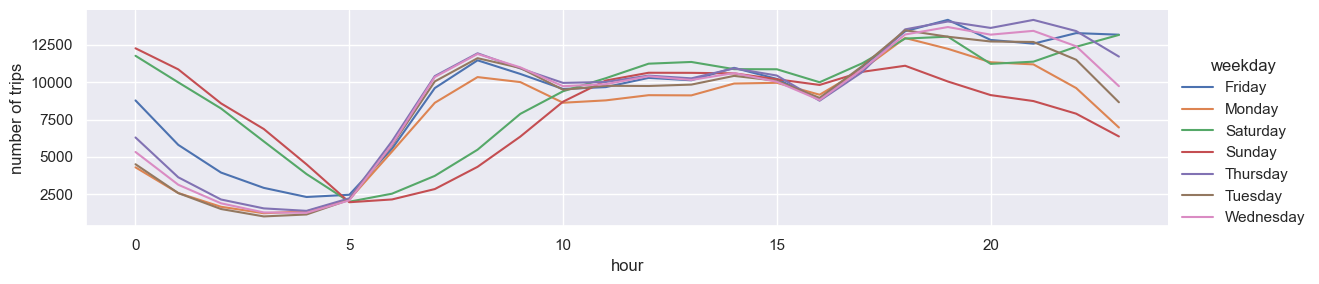

In [32]:
data_plot = X.groupby([weekday, hourofday]).size().rename('number of trips').reset_index()
sns.relplot(data=data_plot, x='hour', y='number of trips', hue='weekday', kind='line', height=3, aspect=4)
plt.show()

Add your interpretation of the results.

<font color='yellowgreen'>your text here</font>

### 4.4. Trip duration ~ date, day of the week, hour of the day

Display the distribution of the average target value by the date, the day of the week, and the time of the day.

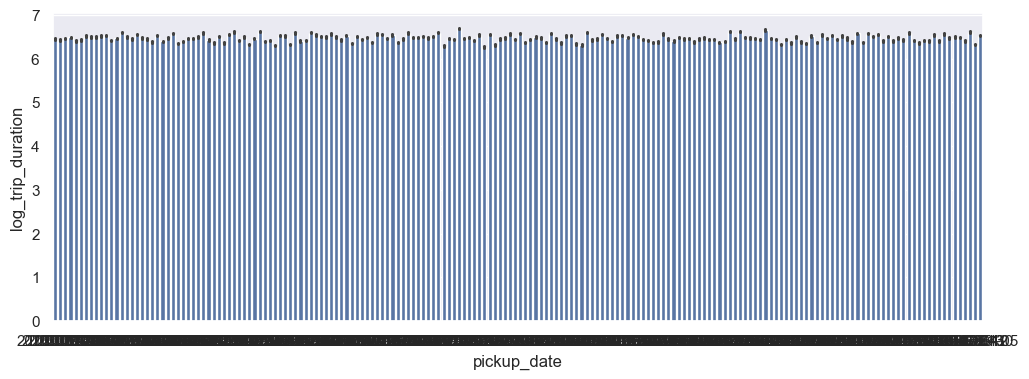

In [33]:
sns.barplot(x=X['pickup_date'], y=y)
plt.show()

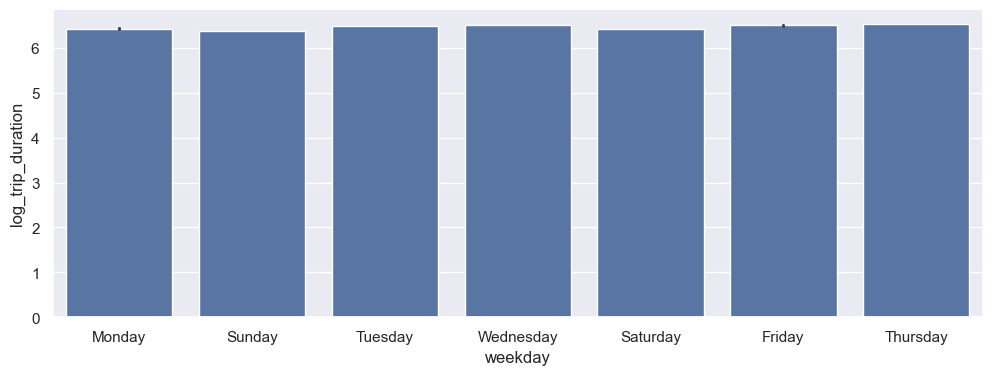

In [34]:
sns.barplot(x=weekday, y=y)
plt.show()

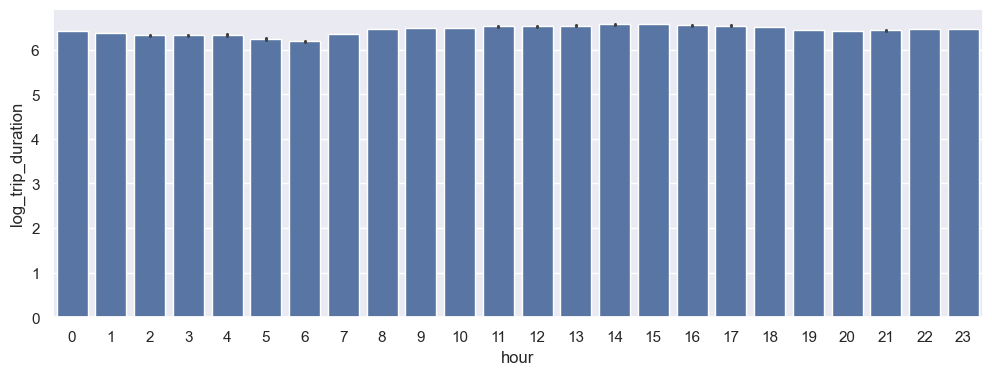

In [35]:
sns.barplot(x=hourofday, y=y)
plt.show()

**Question**: Display the graphs showing the dependency of the target variable on the day of the week and the time of day. What happens to the target variable during the two special periods seen before? Why? Are there any trends in the graph of `log_trip_duration` in relation to the day of the year?

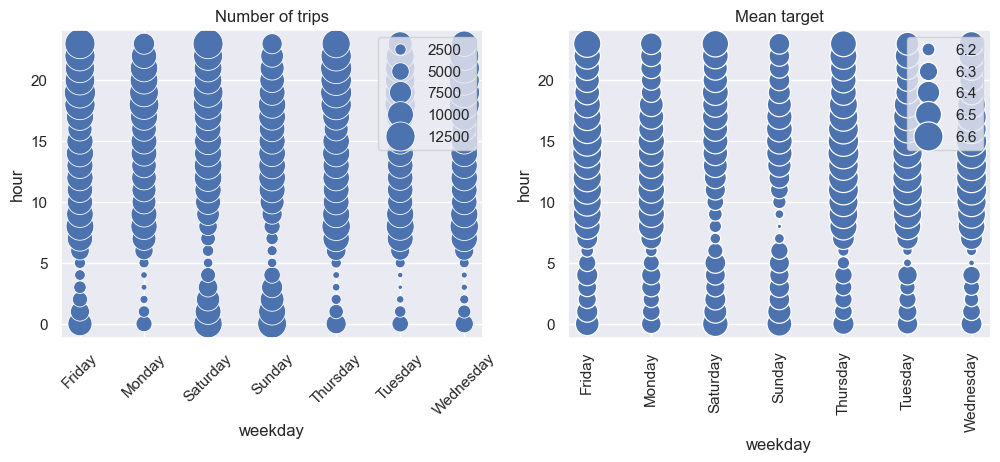

In [36]:
fig, ax = plt.subplots(1,2)

data_plot0 = X.groupby([weekday, hourofday]).size().rename('number of trips').reset_index()
sns.scatterplot(data=data_plot0, x='weekday', y='hour', size='number of trips', sizes=(10,500), ax=ax[0])
ax[0].set_title('Number of trips')
ax[0].tick_params('x', labelrotation=45)
ax[0].legend(loc="upper right")

data_plot1 = y.groupby([weekday, hourofday]).mean().rename('mean_target').reset_index()
sns.scatterplot(data=data_plot1, x='weekday', y='hour', size='mean_target', sizes=(10,500), ax=ax[1])
ax[1].set_title('Mean target')
ax[1].tick_params('x', labelrotation=90)
ax[1].legend(loc="upper right")

plt.show()

<font color='yellowgreen'>your text here</font>

### 4.5. New features

Add new variables based on `pickup_datetime`:

1.   Day of week
2.   Month
3.   Hour of day
4.   If the period is "abnormal" (two binary variables for two periods detected)

In [54]:
def step1_add_features(X):
  res = X.copy()
  res['weekday'] = res['pickup_datetime'].dt.weekday
  res['month'] = res['pickup_datetime'].dt.month
  res['hour'] = res['pickup_datetime'].dt.hour
  #res['abnormal_period'] = res['pickup_datetime'].dt.date.isin(abnormal_dates.index).astype(int)
  return res

X = step1_add_features(X)
X_train = step1_add_features(X_train)
X_test = step1_add_features(X_test)

X_train.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,weekday,month,hour,abnormal_period
1011257,2,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,N,1,5,9,0
178550,1,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,N,4,1,16,0
551460,1,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,N,6,4,13,0
1434271,2,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,N,6,1,17,0
1173610,1,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,N,3,2,17,0


In [ ]:
X_train.to_csv('../data/train.csv', index=False)
X_test.to_csv('../data/test.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)


In [45]:
# check the transformation
display(X['weekday'].value_counts().head())
display(X['month'].value_counts().head())
display(X['hour'].value_counts().head())
#display(X['abnormal_period'].value_counts())

weekday
4    223533
5    220868
3    218574
2    210136
1    202749
Name: count, dtype: int64

month
3    256189
4    251645
5    248487
2    238300
6    234316
Name: count, dtype: int64

hour
18    90600
19    90308
21    84185
20    84072
22    80492
Name: count, dtype: int64

**Question**: Which of the variables should be considered as categorical and which as numerical? Why?

<font color='yellowgreen'>your text here</font>

### 4.6. Ridge regression

* Use only the features we have worked with up to now.
* Encode categorical features using `OneHotEncoder`.
* Scale numerical features using the `StandardScaler`.
* Train Ridge regression with the default settings.

In [46]:
X.columns

Index(['vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'pickup_date', 'weekday', 'month', 'hour',
       'abnormal_period'],
      dtype='object')

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [48]:
num_features = ['hour']
cat_features = ['weekday', 'month']
train_features = num_features + cat_features

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cat_features),
    ('scaling', StandardScaler(), num_features)]
)

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[train_features], y_train)
y_pred_train = model.predict(X_train[train_features])
y_pred_test = model.predict(X_test[train_features])

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_pred_train, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_test, squared=False))
print("Test R2 = %.4f" % r2_score(y_test, y_pred_test))

Train RMSE = 0.7930
Test RMSE = 0.7920
Test R2 = 0.0076


c:\Users\Salioudian\IdeaProjects\projet_mlops\taxi_trips\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Salioudian\IdeaProjects\projet_mlops\taxi_trips\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
